# Modelagem Iris - Regressão Linear & Logistica
#### Alex Cecconi de Souza 

## Preprocessamento dos dados

In [9]:
import pandas as pd

In [10]:
# Precisei colocar 'r' como prefixo no caminho pra sair caminho normal para Raw string, ou inverter as barras
df = pd.read_csv(r"C:\Users\Alex\Desktop\Aprendizado_de_Maquina\Atividade_01\Iris\iris_data", sep=",", header=None)
df.columns = ["sepal_length","sepal_width","petal_length","petal_width","class"]

In [11]:
df.head(n=5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000233CE1F90F0>,
      dtype=object)

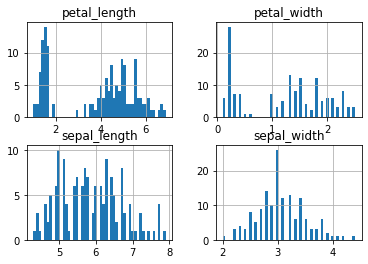

In [12]:
hist = df.hist(bins = 50)
hist

In [13]:
from sklearn import preprocessing
import numpy as np

In [14]:
df_numeric = df[['sepal_length','sepal_width','petal_length','petal_width']]
#X_array = np.array(df_numeric)

In [15]:
Scaler = preprocessing.StandardScaler()
array_scaler = Scaler.fit_transform(df_numeric)

In [16]:
Data_Scaler = pd.DataFrame(array_scaler, columns=['var1','var2','var3','var4'])

In [17]:
Data_Scaler.head(n=10)

,var1,var2,var3,var4
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


In [18]:
#Cruza as bases df e data_scaler que eu havia separado
Base_final = df.join(Data_Scaler).iloc[:,4:]#.head(n=10)

In [29]:
#Separa em X e Y, sendo que em Y eu codifico em um vetor com três valores (cada classe)
X = Base_final.iloc[:,1:5]
y = Base_final.iloc[:,0]
d={"Iris-setosa":[1,0,0], "Iris-versicolor":[0,1,0],"Iris-virginica":[0,0,1]}
y_cod = np.loadtxt(r"C:\Users\Alex\Desktop\Aprendizado_de_Maquina\Atividade_01\Iris\iris_data", delimiter=',', dtype=None, usecols=(4), encoding='UTF', converters={4:d.get})

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

In [21]:
X_train, X_test, y_train, y_test =     train_test_split(X, y,     test_size=0.33, random_state=42, stratify = y)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y_cod, test_size=0.33, random_state=42, stratify = y_cod)
X_tr, X_test, y_tr, y_test =           train_test_split(X_treino, y_treino, test_size=0.33, random_state=42, stratify = y_treino)

---------------
Como eu estava tendo problemas poara fazer a regressão logistica por matriz e não consegui, eu fiz via toolbox para aprender, segue abaixo:

In [23]:
from sklearn.linear_model import LogisticRegression #Importa modelo
Log_reg = LogisticRegression(multi_class='multinomial', solver = 'newton-cg') # Instancia o modelo
Log_reg.fit(X_train,y_train) # roda logistica
y_pred = Log_reg.predict(X_test) # Faz a predição em labels
y_pred_prob = Log_reg.predict_proba(X_test) ## Faz a predição em probabilidade
log_loss(y_test,y_pred_prob) #Cross Entropy

0.1396858238952814

----------------
# Classificação Linear
Com esta equação nos encontramos os pesos \
$\overrightarrow{w} =  (  \gamma I + X^{t}X )^{-1}  X^{t}\overrightarrow{y}   $ \
Aqui é classificação \
$h(\overrightarrow{w}) = \overrightarrow{w} \cdot \overrightarrow{x}$

In [25]:
X = X_tr

In [26]:
#Para modelos regularizados, usando a validação, abaixo são efetuados três modelos, um para cada classe, 
# e depois concateno para que possa aplicar o argmax em cima.
Valores = []
gama = 0
for gama in range(0,1000,10):
    Omega1 = np.linalg.inv( np.multiply(gama,np.identity(4)) +  X.T.dot(X)).dot(X.T).dot(y_tr[:,0]) # Pesos
    y_hat1 = np.sum(Omega1*X_valid, axis=1) # Predição

    Omega2 = np.linalg.inv( np.multiply(gama,np.identity(4)) +  X.T.dot(X)).dot(X.T).dot(y_tr[:,1]) # Pesos
    y_hat2 = np.sum(Omega2*X_valid, axis=1) # Predição

    Omega3 = np.linalg.inv( np.multiply(gama,np.identity(4)) +  X.T.dot(X)).dot(X.T).dot(y_tr[:,2]) # Pesos
    y_hat3 = np.sum(Omega3*X_valid, axis=1) # Predição

    y_hat0 = np.block([[np.array(y_hat1)], [np.array(y_hat2)], [np.array(y_hat3)]]).T # Concatenação dos pesoas de cada classe
    y_hat = np.argmax(y_hat0, axis = 1) # Predição multiclass
    Y_valid = np.argmax(y_valid, axis=1)
    Acuracia = np.sum(y_hat == Y_valid)/len(Y_valid)
    Valores.append(Acuracia) 

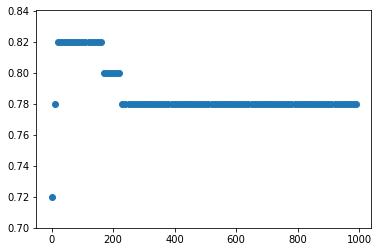

In [27]:
import matplotlib.pyplot as plt
plt.scatter(range(0,1000,10),Valores)
plt.show()

In [28]:
#Usando melhor configuração, na base de teste
gama = 100
X = X_tr

Omega1 = np.linalg.inv( np.multiply(gama,np.identity(4)) +  X.T.dot(X)).dot(X.T).dot(y_tr[:,0]) # Pesos
y_hat1 = np.sum(Omega1*X_test, axis=1) # Predição

Omega2 = np.linalg.inv( np.multiply(gama,np.identity(4)) +  X.T.dot(X)).dot(X.T).dot(y_tr[:,1]) # Pesos
y_hat2 = np.sum(Omega2*X_test, axis=1) # Predição

Omega3 = np.linalg.inv( np.multiply(gama,np.identity(4)) +  X.T.dot(X)).dot(X.T).dot(y_tr[:,2]) # Pesos
y_hat3 = np.sum(Omega3*X_test, axis=1) # Predição

y_hat0 = np.block([[np.array(y_hat1)], [np.array(y_hat2)], [np.array(y_hat3)]]).T # Concatenação dos pesoas de cada classe
y_hat = np.argmax(y_hat0, axis = 1) # Predição multiclass
Y_test = np.argmax(y_test, axis=1)
Acuracia = np.sum(y_hat == Y_test)/len(Y_test)
round(Acuracia,3)

0.879

-------------------------
# Regressão SoftMax
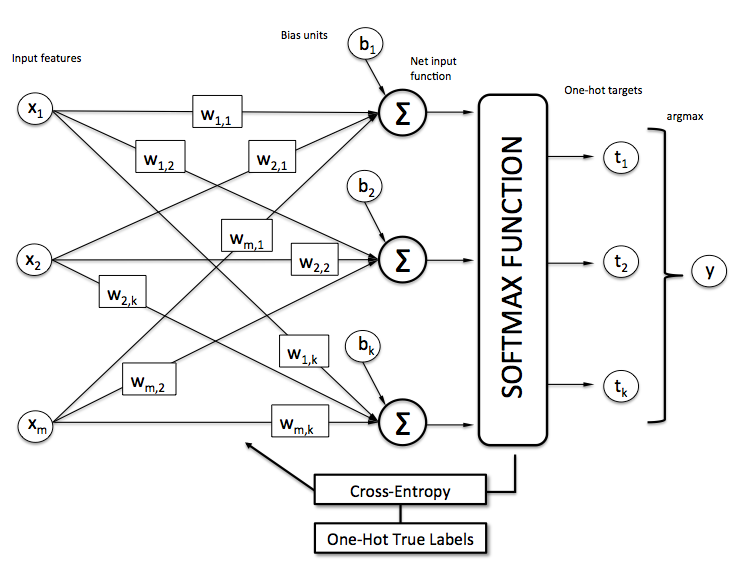

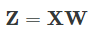

In [35]:
def net_input(X, W):
    return (X.dot(W))

W =   np.random.rand(4,3) #Pesos sendo feature x prob classes
net_in = net_input(X_treino, W)
#print('net input:\n', net_in)

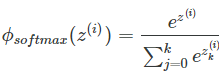

In [37]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

smax = softmax(net_in)
#print('softmax:\n', smax)

In [43]:
#Define a classe provavel
def to_classlabel(z):
    return z.argmax(axis=1)

print('predicted class labels: ', to_classlabel(smax.values))

predicted class labels:  [2 1 2 0 0 0 0 2 1 1 1 0 0 1 2 2 1 0 2 0 2 0 0 2 1 1 2 0 0 0 0 2 0 2 1 1 2
 0 2 1 0 0 1 2 0 1 0 2 0 2 0 0 1 2 1 0 0 1 0 1 2 1 2 2 0 2 0 1 2 0 2 2 2 0
 2 0 0 2 2 2 0 1 2 2 1 0 1 0 1 0 0 2 0 2 1 0 1 0 0 0]


O --> Softmax \
T --> y real
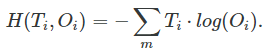

In [49]:
def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

xent = cross_entropy(smax, y_treino)
#print('Cross Entropy:', xent)

In [50]:
def cost(output, y_target):
    return np.mean(cross_entropy(output, y_target))

J_cost = cost(smax, y_treino)
print('Cost: ', J_cost)

Cost:  1.4154020732860513


Gradiente da função custo Softamx
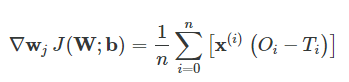

In [ ]:
J = X_treino @ (smax - y_treino)

Descendente
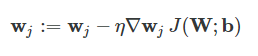

In [ ]:
i, n_iteracoes  = 1, 10000 # Parametros de interação
eta = 0.001 # taxa de aprendizado
precisao = 0.00001
Delta_Ws = 1

In [ ]:
#Processo descendente 
for i in range(n_iteracoes)  :
    w_old = W 
    z = net_input(X, W)
    J = X_treino @ (softmax(z) - y_treino)
    W = W -  eta*J
    Delta_Ws = abs( np.linalg.norm(W) - np.linalg.norm(w_old) )
    print(Delta_Ws, i)
    if Delta_Ws < precisao:
        break

-------------

### Avaliando

In [ ]:
#Com um W ajustado reaplico em z e softmax para avaliarmos a qualidade.
#Aqui aplico na base de test

net_in = net_input(X_test, W) #nopvo Z
smax = softmax(net_in) #Softmax

#Entropía Cruzada
xent = cross_entropy(smax, y_test)
J_cost = cost(smax, y_test) #Média do xent

Estava dando um erro, que agora no limite da entrega, não pude corrigir, então deixo o final sem resultado.

# Fim